In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv") #loading the dataset

In [3]:
Data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
Data.shape #checking the row and columns

(200, 5)

In [5]:
Data.isnull().sum() #checking any null values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
# No null values has been observed

In [7]:
Data.info() #Checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
Data.describe() #Checking the statistics of the data

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
#Column unnmaed can be removed as it has no contribution to the data.
# There is a huge difference in mean and standard deviation in all the columns, implying that data can be skewed and outliers can be ,present
#Radio has zero investment which needs to be looked into and changed if necessary

In [10]:
Data.loc[Data["radio"]==0] #checking the row which has zero investment in radio

,Unnamed: 0,TV,radio,newspaper,sales
127,128,80.2,0.0,9.2,8.8


In [11]:
# Not changing anything as its possible that investment is made in TV and newspaper and not in radio

In [12]:
Data=Data.drop("Unnamed: 0",axis=1) #Dropping Unnamed 0 as it has no contribution to the data.

In [13]:
Data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
X= Data.drop("sales",axis=1)
Y=Data["sales"] #Dividing the data into feature and target

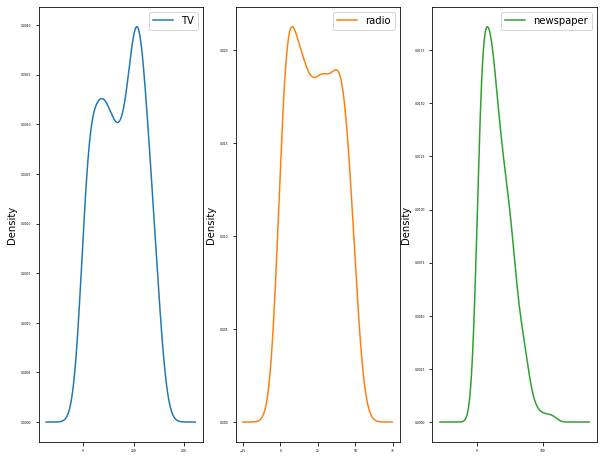

In [15]:
X.plot(kind='kde',subplots=True,layout=(1,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show()

In [18]:
#TV and radio looks normally distributed, however newspaper shows to be right skewed

In [19]:
X.skew().sort_values(ascending=False)

newspaper    0.894720
radio        0.094175
TV          -0.069853
dtype: float64

In [20]:
#Newspaper needs to be power tramsformed

In [21]:
from sklearn.preprocessing import power_transform

In [25]:
New_Newspaper=power_transform(X[["newspaper"]])

In [28]:
pd.DataFrame(New_Newspaper).skew() # transforming the data to reduce skewness

0   -0.077942
dtype: float64

In [29]:
X["newspaper"]=pd.DataFrame(New_Newspaper) #Transforming the skewed value of newspaper in the old data 

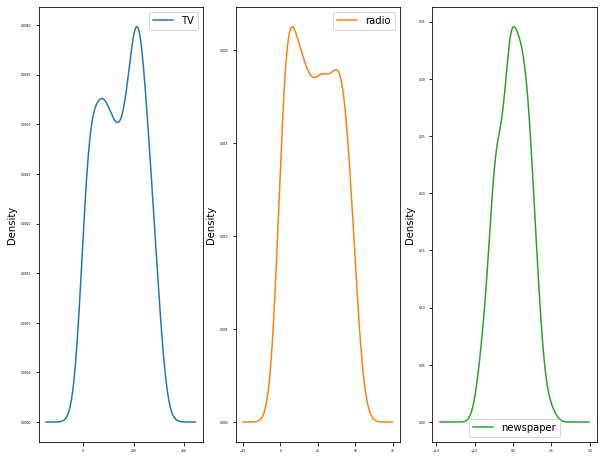

In [30]:
X.plot(kind='kde',subplots=True,layout=(1,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #visualizing the data after transforming newspaper

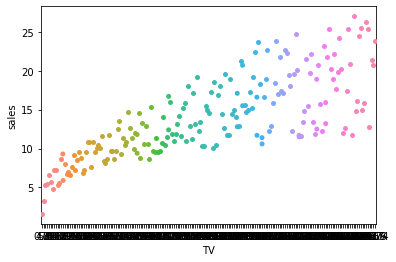

In [32]:
sns.stripplot(X["TV"],Y)
plt.show() #Checking the relation of features with label

In [33]:
#It can be said that there is a positivive relation between TV and sales because as investment in TV increased so did sales increase

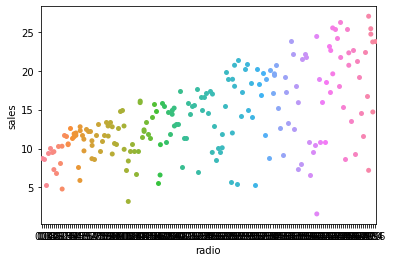

In [34]:
sns.stripplot(X["radio"],Y)
plt.show() #Checking the relation of features with label

In [38]:
#It can be said that there is a positivive relation between radio and sales because as investment in radio increased so did sales increase.
#However there are few outliers observed and the relation is not as strong as TV and sales

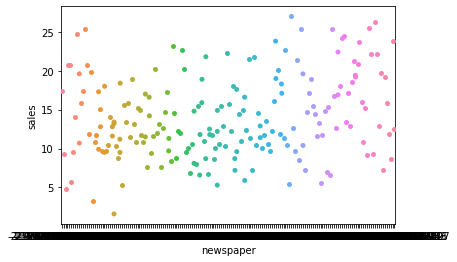

In [36]:
sns.stripplot(X["newspaper"],Y)
plt.show() #Checking the relation of features with label

In [37]:
#It can be said that there is not much positivive relation between newspaper and sales because data is scattered and there is no fixed pattern.


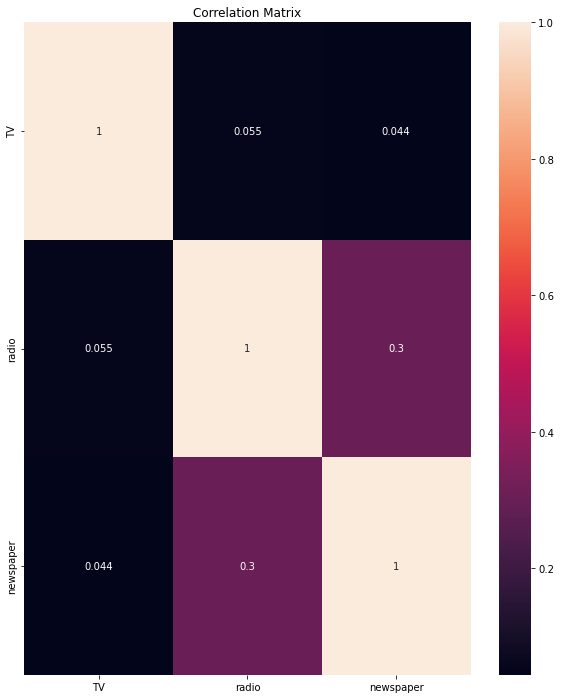

In [39]:
corr_mat=X.corr()
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [40]:
#From the heatmap, there is not much co-relation observed between the features variables

In [41]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,TV,2.289921
1,radio,2.351347
2,newspaper,1.051119


In [42]:
# From the VIF, it can be concluded that there is not much issue of multicollinearity in the features

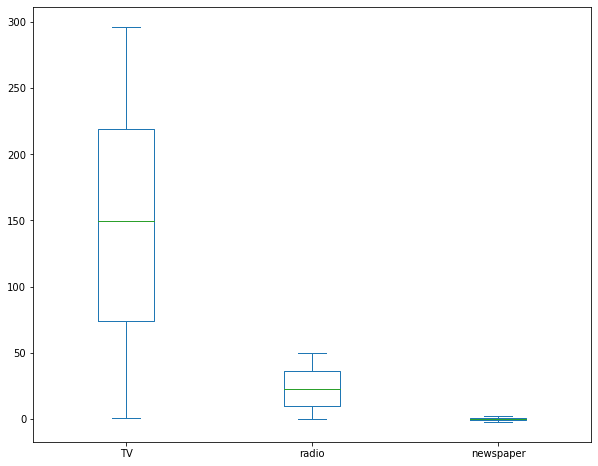

In [45]:
X.plot(kind='box',figsize=(10,8),layout=(4,3))
plt.show() #checking for oultiers

In [46]:
#From the above figure, no outlier can be observed, hence need to check via zscore

In [47]:
from scipy.stats import zscore

In [49]:
(np.abs(zscore(X)>3)).all()

TV           False
radio        False
newspaper    False
dtype: bool

In [50]:
#Therefore it can be concluded that there is no outliers present in the data

In [51]:
Scalar=StandardScaler() #scaling the data

In [52]:
X_Scaled=Scalar.fit_transform(X)
#scaling the features

array([[ 9.69852266e-01,  9.81522472e-01,  1.51433531e+00],
       [-1.19737623e+00,  1.08280781e+00,  7.87682518e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.51699753e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.21465643e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.21170398e+00],
       [-1.61540845e+00,  1.73103399e+00,  1.66502354e+00],
       [-1.04557682e+00,  6.43904671e-01, -1.07753498e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.44093412e-01],
       [-1.61657614e+00, -1.42906863e+00, -2.13259669e+00],
       [ 6.16042873e-01, -1.39530685e+00, -2.29003949e-01],
       [-9.45155670e-01, -1.17923146e+00, -7.22615630e-02],
       [ 7.90028350e-01,  4.96973404e-02, -1.60261898e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.42512925e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.22982506e+00],
       [ 6.66253447e-01,  6.50657027e-01,  8.18605793e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.04432344e+00],
       [-9.25304978e-01,  9.00494200e-01

# Linear Regression

In [53]:
LR=LinearRegression()

In [55]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 85.98346413778896
/n
At random state 1 the testing accurancy is:- 89.1727065060083
/n
At random state 2 the testing accurancy is:- 75.42786382612512
/n
At random state 3 the testing accurancy is:- 91.21533303197894
/n
At random state 4 the testing accurancy is:- 90.82065732852736
/n
At random state 5 the testing accurancy is:- 89.85960457601486
/n
At random state 6 the testing accurancy is:- 92.0644134210565
/n
At random state 7 the testing accurancy is:- 90.95254030305456
/n
At random state 8 the testing accurancy is:- 84.7137903735244
/n
At random state 9 the testing accurancy is:- 92.59120231302992
/n
At random state 10 the testing accurancy is:- 83.48718910829902
/n
At random state 11 the testing accurancy is:- 84.65509186774685
/n
At random state 12 the testing accurancy is:- 91.37377279122315
/n
At random state 13 the testing accurancy is:- 93.1071239436271
/n
At random state 14 the testing accurancy is:- 85.49330952152326
/n
At random

In [56]:
#We can see that at random state 98, the r2 score is highest with 94 percent

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=98)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)

In [63]:
LR_Score= r2_score(y_test,pred_test)*100
LR_Score

94.00192678749649

# Random Forest Regressor

In [61]:
RF=RandomForestRegressor()

In [64]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    RF.fit(X_train,y_train)
    pred_test=RF.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 96.84494860192754
/n
At random state 1 the testing accurancy is:- 97.73526549436366
/n
At random state 2 the testing accurancy is:- 97.35749583393755
/n
At random state 3 the testing accurancy is:- 98.26137454403437
/n
At random state 4 the testing accurancy is:- 97.59279204983365
/n
At random state 5 the testing accurancy is:- 98.58009773832053
/n
At random state 6 the testing accurancy is:- 97.58764660194582
/n
At random state 7 the testing accurancy is:- 98.20511060472357
/n
At random state 8 the testing accurancy is:- 96.93735823965831
/n
At random state 9 the testing accurancy is:- 97.83369852975248
/n
At random state 10 the testing accurancy is:- 97.862555077715
/n
At random state 11 the testing accurancy is:- 97.461781139275
/n
At random state 12 the testing accurancy is:- 98.26350213806549
/n
At random state 13 the testing accurancy is:- 97.5576434457611
/n
At random state 14 the testing accurancy is:- 96.00166711597485
/n
At random 

In [65]:
#We can see that at random state 48, the r2 score is highest with 98.82 percent

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=48)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test)

In [67]:
RF_Score= r2_score(y_test,pred_test)*100
RF_Score

98.80441855250449

# Gradient Boosting

In [68]:
GB=GradientBoostingRegressor()

In [69]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    GB.fit(X_train,y_train)
    pred_test=GB.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 96.8116951291777
/n
At random state 1 the testing accurancy is:- 97.59144561308449
/n
At random state 2 the testing accurancy is:- 97.54731578236363
/n
At random state 3 the testing accurancy is:- 98.26023668811041
/n
At random state 4 the testing accurancy is:- 97.94283488276754
/n
At random state 5 the testing accurancy is:- 98.28329667598615
/n
At random state 6 the testing accurancy is:- 97.72890111882634
/n
At random state 7 the testing accurancy is:- 98.38978515401648
/n
At random state 8 the testing accurancy is:- 96.84088263298305
/n
At random state 9 the testing accurancy is:- 97.53209901393288
/n
At random state 10 the testing accurancy is:- 97.50870439459419
/n
At random state 11 the testing accurancy is:- 97.36271026210184
/n
At random state 12 the testing accurancy is:- 98.58620110972619
/n
At random state 13 the testing accurancy is:- 97.97831806412447
/n
At random state 14 the testing accurancy is:- 96.2002362353812
/n
At rand

In [70]:
#At random state 69, score for test data is highest at 99%

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=69)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)

In [74]:
GB_Score=r2_score(y_test,pred_test)*100
GB_Score

99.07203510641997

# Decision Tree Regressor

In [75]:
DT=DecisionTreeRegressor()

In [76]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    DT.fit(X_train,y_train)
    pred_test=DT.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 94.06011108791841
/n
At random state 1 the testing accurancy is:- 95.97963707038429
/n
At random state 2 the testing accurancy is:- 96.15103940440699
/n
At random state 3 the testing accurancy is:- 95.6634351624299
/n
At random state 4 the testing accurancy is:- 96.48271989250236
/n
At random state 5 the testing accurancy is:- 96.14641435353637
/n
At random state 6 the testing accurancy is:- 89.48680516799776
/n
At random state 7 the testing accurancy is:- 94.72388846069353
/n
At random state 8 the testing accurancy is:- 92.62454053784256
/n
At random state 9 the testing accurancy is:- 94.79388098700522
/n
At random state 10 the testing accurancy is:- 95.60192170222828
/n
At random state 11 the testing accurancy is:- 95.93715088400289
/n
At random state 12 the testing accurancy is:- 96.09374696463081
/n
At random state 13 the testing accurancy is:- 96.945452739366
/n
At random state 14 the testing accurancy is:- 94.93194990250377
/n
At rando

In [78]:
#At random state 75 the testing accurancy is:- 97.48%

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=75)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test)

In [81]:
DT_Score=r2_score(y_test,pred_test)*100
DT_Score

97.42289963766466

# Cross Validation for LR

In [82]:
for i in range(2,10):
    LR_Val=cross_val_score(LR,X,Y,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.8917673193313229
The cross validation score for 3 is 0.8915466333254125
The cross validation score for 4 is 0.890426357602035
The cross validation score for 5 is 0.887392751737931
The cross validation score for 6 is 0.8900435833286794
The cross validation score for 7 is 0.8862315547791276
The cross validation score for 8 is 0.882694543986398
The cross validation score for 9 is 0.8824803701418551


# Cross Validation for RF

In [86]:
for i in range(2,10):
    RF_Val=cross_val_score(RF,X,Y,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is 97.01448489182818
The cross validation score for 3 is 97.42716679444975
The cross validation score for 4 is 97.64915160489609
The cross validation score for 5 is 97.57434032116365
The cross validation score for 6 is 97.8754861790454
The cross validation score for 7 is 97.56737421973355
The cross validation score for 8 is 97.72077669449212
The cross validation score for 9 is 97.53384157486268


# Cross Validation for GB

In [85]:
for i in range(2,10):
    GB_Val=cross_val_score(GB,X,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean()*100)

The cross validation score for 2 is 97.37631069468556
The cross validation score for 3 is 97.83047520326372
The cross validation score for 4 is 97.93344890562233
The cross validation score for 5 is 97.76234646133611
The cross validation score for 6 is 97.79533141076858
The cross validation score for 7 is 97.63227527224804
The cross validation score for 8 is 97.94237494038084
The cross validation score for 9 is 97.63293340721584


# Cross Validation for DT

In [87]:
for i in range(2,10):
    DT_Val=cross_val_score(DT,X,Y,cv=i)
    print("The cross validation score for",i,"is",DT_Val.mean()*100)

The cross validation score for 2 is 93.18777450076963
The cross validation score for 3 is 95.31320637377367
The cross validation score for 4 is 94.4820183709656
The cross validation score for 5 is 95.16675315846022
The cross validation score for 6 is 95.44930435079411
The cross validation score for 7 is 95.20512730098453
The cross validation score for 8 is 94.64376869127507
The cross validation score for 9 is 94.73771857195918


### By observing the cross validation and testing score, it can be said that Gradient Boost gives the highest score 
### The cross validation is highest as compared to rest of the models and is nearer to the r2 score


# Hyper parameter tuning

In [89]:
GB=GradientBoostingRegressor()

In [103]:
Parameters={'learning_rate':[0.0001,.001,.01,.1,1],'criterion':['friedman_mse', 'mse', 'mae'],'min_samples_split':[3,4],'min_samples_leaf':[1,2,3]}
clf=GridSearchCV(GB,Parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4]})

In [104]:
clf.best_params_ #taking the best parameters

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [105]:
clf.best_estimator_

GradientBoostingRegressor(min_samples_leaf=3, min_samples_split=3)

In [106]:
GB_Tuning=clf.best_estimator_.predict(X_test)  #predicting with the best parameters

In [108]:
GB_Tuning_Score=r2_score(y_test,GB_Tuning)
GB_Tuning_Score

0.990627691819317

In [118]:
# It seems that our score reduced

### Taking few more parameters and tweaking it a bit

In [119]:
GB=GradientBoostingRegressor(criterion='mse',min_samples_leaf=2, min_samples_split=3) #random parameters

In [120]:
GB.fit(X_train,y_train) #training the model

GradientBoostingRegressor(criterion='mse', min_samples_leaf=2,
                          min_samples_split=3)

In [122]:
pred_Y=GB.predict(X_test) #Predicting the data with the new parameters

In [123]:
GB_Score=r2_score(y_test,pred_Y)*100 #finding the score

In [117]:
GB_Score

99.1032934354619

In [124]:
#Score increased

# Saving the model

In [125]:
import pickle
filename='Advertisement.pkl'
pickle.dump(GB,open(filename,'wb')) ##saving the model